### In this multiclass classification problem, we will be using the MNIST dataset consists of 70000 small image of digits. Each image is labeled with the digit (0 - 9) it represents. Here we will be using multiclass classifier algorithms to to distinguish between more than two classes.
Reference: "Hands - On Machine Learning with Scikit - Learn, Keras, and TensorFlow, 2nd Edition, by Aurelien Geron (O'Reilly)"

### The following code fetches MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

### There are 70000 images and each image is of size 28x28

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### consider each instance, reshape it to 28x28 array and display using Matplotlib's imshow() function

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[4]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
y[4]

'9'

In [6]:
import numpy as np
y = y.astype(np.uint8)
y[4]

9

### split the dataset into training and test set

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### use SVM classifier (One vs One)

In [58]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
svm_clf.predict([some_digit])

array([9], dtype=uint8)

In [60]:
some_digit_scores_svm = svm_clf.decision_function([some_digit])
some_digit_scores_svm

array([[ 3.83583746,  8.03753281,  2.82800123,  5.86497842,  1.82010815,
        -0.22955659,  4.84708487,  6.91484871,  0.80051803,  9.29881196]])

In [61]:
import numpy as np
np.argmax(some_digit_scores_svm)

9

In [62]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### One vs Rest

In [73]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto', kernel='rbf',
                                  max_iter=-1, probability=False,
                                  random_state=42, shrinking=True, tol=0.001,
                                  verbose=False),
                    n_jobs=None)

In [14]:
ovr_clf.predict([some_digit])

array([9], dtype=uint8)

In [15]:
some_digit_scores_ovr = ovr_clf.decision_function([some_digit])
some_digit_scores_ovr

array([[-1.00000216, -0.99963766, -0.99949709, -1.00000323, -0.99986906,
        -0.99926435, -0.99976287, -0.99933311, -0.99943631,  0.11111111]])

In [16]:
np.argmax(some_digit_scores_ovr)

9

In [17]:
ovr_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### SGD classifier

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([9], dtype=uint8)

In [21]:
some_digit_scores_sgd = sgd_clf.decision_function([some_digit])
some_digit_scores_sgd

array([[-45606.88156161, -20077.79903687, -23620.86693862,
        -11077.35532351,  -8578.08720996,  -7133.8897717 ,
        -27033.93740198,  -8312.88994614,  -3257.29010483,
          2193.22821614]])

In [22]:
np.argmax(some_digit_scores_sgd)

9

In [23]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Random forest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

frst_clf = RandomForestClassifier(random_state = 42)
frst_clf.fit(X_train[:1000], y_train[:1000])

C:\Users\Mahesh Kumar M R\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
frst_clf.predict([some_digit])

array([9], dtype=uint8)

In [26]:
len(frst_clf.estimators_)

10

In [29]:
frst_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### K nearest neighbor classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train[:1000], y_train[:1000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [64]:
knn_clf.predict([some_digit])

array([9], dtype=uint8)

In [65]:
knn_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Evaluate SGDClassifer's accuracy

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.83333333, 0.86699507, 0.81909548, 0.85353535, 0.81632653])

### Evaluate  OneVsOne classifier's accuracy

In [39]:
cross_val_score(svm_clf,X_train[:1000], y_train[:1000] , cv = 5, scoring = "accuracy")

array([0.11764706, 0.18226601, 0.11557789, 0.11616162, 0.11734694])

### Evaluate OneVsAll classifier's accuracy

In [40]:
cross_val_score(ovr_clf, X_train[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.11764706, 0.1182266 , 0.11557789, 0.11616162, 0.11734694])

### Evaluate RandomForest classifier's accuracy

In [41]:
cross_val_score(frst_clf, X_train[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.78921569, 0.84236453, 0.80904523, 0.83838384, 0.79591837])

### Evaluate K nearest neighbor classifier's accuracy

In [42]:
cross_val_score(knn_clf, X_train[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.8627451 , 0.84236453, 0.86934673, 0.86363636, 0.89285714])

### Scaling the inputs

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [49]:
cross_val_score(sgd_clf, X_train_scaled[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.84313725, 0.86699507, 0.8040201 , 0.82828283, 0.79591837])

In [50]:
cross_val_score(svm_clf, X_train_scaled[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.8872549 , 0.85714286, 0.8241206 , 0.85353535, 0.87244898])

In [51]:
cross_val_score(ovr_clf, X_train_scaled[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.85784314, 0.85714286, 0.81407035, 0.84343434, 0.87244898])

In [52]:
cross_val_score(frst_clf, X_train_scaled[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.78921569, 0.84236453, 0.80904523, 0.83838384, 0.79591837])

In [53]:
cross_val_score(knn_clf, X_train_scaled[:1000], y_train[:1000], cv = 5, scoring = "accuracy")

array([0.80392157, 0.84236453, 0.78894472, 0.78282828, 0.83673469])

### choose the best classifier and do the error analysis

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train_scaled[:10000], y_train[:10000], cv = 3)

In [57]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train[:10000], y_train_pred[:10000])
conf_mat

array([[ 92,   0,   2,   0,   0,   0,   1,   1,   1,   0],
       [  0, 111,   0,   0,   0,   2,   0,   1,   1,   1],
       [  1,   8,  81,   1,   2,   0,   1,   3,   1,   1],
       [  0,   1,   5,  77,   0,   4,   0,   4,   1,   1],
       [  0,   0,   0,   1,  94,   3,   1,   3,   0,   3],
       [  0,   1,   2,   8,   2,  73,   2,   0,   1,   3],
       [  2,   3,   2,   0,   1,   2,  77,   7,   0,   0],
       [  1,   2,   0,   0,   3,   0,   0, 105,   0,   6],
       [  0,   6,   3,   0,   1,   9,   0,   3,  64,   1],
       [  2,   0,   1,   0,  10,   1,   0,  14,   1,  71]], dtype=int64)

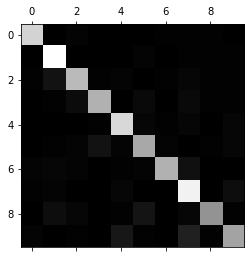

In [67]:
import matplotlib.pyplot as plt
plt.matshow(conf_mat, cmap = plt.cm.gray)
plt.show()

In [68]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums

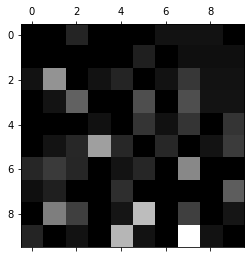

In [69]:
import numpy as np
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap = plt.cm.gray)
plt.show()

### Multilabel classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [71]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
knn_clf.predict([some_digit])

array([[ True,  True]])